# **Bibliotecas**


In [63]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline




# **Importação dos dados**

In [64]:
caminho = 'amostras_projetos.xlsx'


# importação das planilhas
orcamento_p1 = pd.read_excel(caminho, skiprows=13, header=None)
dados_p1 = pd.read_excel(caminho, nrows=7, header=1, usecols=['Titulo','Projeto 1 - Wa'])

orcamento_p2 = pd.read_excel(caminho,sheet_name =1, skiprows=13, header=None)
dados_p2 = pd.read_excel(caminho,sheet_name =1, nrows=7, header=1, usecols=['Titulo','Projeto 2 - Ca'])

orcamento_p3 = pd.read_excel(caminho,sheet_name=2, skiprows=13, header=None)
dados_p3 = pd.read_excel(caminho,sheet_name =2, nrows=7, header=1, usecols=['Titulo','Projeto 3 - Je2'])


In [12]:
orcamento_p1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.,NaN,NaN,NaN,ETAPAS PRE OBRA,NaN,NaN,0.0,NaN,NaN,NaN,8086.25,NaN,8086.25
1,1.1.,NaN,NaN,NaN,SONDAGEM,NaN,NaN,0.0,NaN,NaN,NaN,3000.00,NaN,3000.00
2,1.1.1,MKS_COMPOSICOES,COMPOSICAO,CMP_INF-SON,SONDAGEM,VB,1.0,0.0,NaN,NaN,3000.00,3000.00,3000.00,3000.00
3,1.2.,NaN,NaN,NaN,LEVANTAMENTO TOPOGRAFICO,NaN,NaN,0.0,NaN,NaN,NaN,1200.00,NaN,1200.00
4,1.2.1,MKS_COMPOSICOES,COMPOSICAO,CMP_INF-LVT,LEVANTAMENTO TOPOGRAFICO,VB,1.0,0.0,NaN,NaN,1200.00,1200.00,1200.00,1200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,16.,NaN,NaN,NaN,FORMALIZACAO DA ENTREGA,NaN,NaN,0.0,NaN,NaN,NaN,912.85,NaN,912.85
147,16.1.,NaN,NaN,NaN,HABITE-SE E AVERBACAO,NaN,NaN,0.0,NaN,NaN,NaN,912.85,NaN,912.85
148,16.1.1,MKS_COMPOSICOES,COMPOSICAO,CMP_EPO-TAX-AVR,TAXA AVERBACAO,VB,1.0,0.0,NaN,NaN,502.85,502.85,502.85,502.85
149,16.1.2,MKS_COMPOSICOES,COMPOSICAO,CMP_EPO-TAX-HBT,TAXA HABITE-SE PREFEITURA,VB,1.0,0.0,NaN,NaN,150.00,150.00,150.00,150.00


# **Engenharia de recursos**

## Seleção e tranformação de variáveis.



In [65]:
# Seleção das variaveis mais significativas
orcamento_p1 = orcamento_p1[[1,4,9,11]]

# criação de um cabeçalho personalidado para o projeto
novos_nomes = {1:'item',4: 'Descrição', 9: 'Preço Material Total', 11: 'Preço Execução Total'}
orcamento_p1 = orcamento_p1.rename(columns=novos_nomes)
orcamento_p1 = orcamento_p1[~orcamento_p1["item"].isna()]


# demais projetos

orcamento_p2 = orcamento_p2[[1,4,9,11]]
novos_nomes = {1:'item',4: 'Descrição', 9: 'Preço Material Total', 11: 'Preço Execução Total'}
orcamento_p2 = orcamento_p2.rename(columns=novos_nomes)
orcamento_p2 = orcamento_p2[~orcamento_p2["item"].isna()]
orcamento_p3 = orcamento_p3[[1,4,9,11]]
novos_nomes = {1:'item',4: 'Descrição', 9: 'Preço Material Total', 11: 'Preço Execução Total'}
orcamento_p3 = orcamento_p3.rename(columns=novos_nomes)
orcamento_p3 = orcamento_p3[~orcamento_p3["item"].isna()]


## **Transformação dos dados**

In [66]:
df1 = orcamento_p1
df2 = orcamento_p2
df3 = orcamento_p3


# Usando o método melt para transformar as colunas largas em uma coluna longa
df_melted = pd.melt(df1, id_vars=['Descrição'], value_vars=['Preço Material Total','Preço Execução Total'])

# Usando o método assign para criar uma nova coluna Atividade unindo Descrição e Atividade
df_resultado_p1 = df_melted.assign(Atividade=df_melted['Descrição'] + '_' + df_melted['variable'])

df_resultado_p1['value'] = df_resultado_p1['value'].fillna(0).astype(float)

# Repetição nos demais projetos
df_melted2 = pd.melt(df2, id_vars=['Descrição'], value_vars=['Preço Material Total','Preço Execução Total'])
df_resultado_p2 = df_melted2.assign(Atividade=df_melted2['Descrição'] + '_' + df_melted2['variable'])
df_resultado_p2['value'] = df_resultado_p2['value'].fillna(0).astype(float)
df_melted3 = pd.melt(df3, id_vars=['Descrição'], value_vars=['Preço Material Total','Preço Execução Total'])
df_resultado_p3 = df_melted3.assign(Atividade=df_melted3['Descrição'] + '_' + df_melted3['variable'])
df_resultado_p3['value'] = df_resultado_p3['value'].fillna(0).astype(float)


df_resultado_p1

,Descrição,variable,value,Atividade
0,SONDAGEM,Preço Material Total,0.0000,SONDAGEM_Preço Material Total
1,LEVANTAMENTO TOPOGRAFICO,Preço Material Total,0.0000,LEVANTAMENTO TOPOGRAFICO_Preço Material Total
2,APROVACAO DE PROJETOS E TAXAS,Preço Material Total,0.0000,APROVACAO DE PROJETOS E TAXAS_Preço Material T...
3,CUSTOS DE IMPRESAO E PLOTAGEM,Preço Material Total,0.0000,CUSTOS DE IMPRESAO E PLOTAGEM_Preço Material T...
4,TAXA RRT,Preço Material Total,0.0000,TAXA RRT_Preço Material Total
...,...,...,...,...
179,LIMPEZA FINAL DE OBRA,Preço Execução Total,3450.0000,LIMPEZA FINAL DE OBRA_Preço Execução Total
180,"FORMALIZACAO DA ENTREGA VISTORIA, ACEITE",Preço Execução Total,1.1158,"FORMALIZACAO DA ENTREGA VISTORIA, ACEITE_Preço..."
181,TAXA AVERBACAO,Preço Execução Total,502.8500,TAXA AVERBACAO_Preço Execução Total
182,TAXA HABITE-SE PREFEITURA,Preço Execução Total,150.0000,TAXA HABITE-SE PREFEITURA_Preço Execução Total


#**Método Simulação Monte Carlo**

O método Monte Carlo é uma técnica de simulação estatística muito utilizada planejamento. Ela se baseia na realização de inumeras repetições simuladas com entradas aleatórias de um fenomeno já estudado.

In [80]:
# Adiciona um componente aleatório para ajustar cada preço

random.seed(4545)

# vetores com comprimento dos orçamentos
num_simulacao = range(10000)
vetor_size_p1 = len(df_resultado_p1['value'])
vetor_size_p2 = len(df_resultado_p2['value'])
vetor_size_p3 = len(df_resultado_p3['value'])

# Extração de valores dos custos associados as atividades
preco_p1 = df_resultado_p1['value']
custos_totais_p1 =[]

preco_p2 = df_resultado_p2['value']
custos_totais_p2 =[]

preco_p3 = df_resultado_p3['value']
custos_totais_p3 =[]

# Elaboração de 10000 iterações ajustando os custos dos orçamentos pelo Monte Carlo

for i in num_simulacao:

  # Orcamento P1
  valor_total_p1 = preco_p1*np.random.normal(loc=1, scale=0.1,size=vetor_size_p1) # multiplicação dos preços por vetor com valores
  custos_totais_p1.append(valor_total_p1.sum())
  # Orcamento P2
  valor_total_p2 = preco_p2*np.random.normal(loc=1, scale=0.1,size=vetor_size_p2)
  custos_totais_p2.append(valor_total_p2.sum())
  # Orcamento P3
  valor_total_p3 = preco_p3*np.random.normal(loc=1, scale=0.1,size=vetor_size_p3)
  custos_totais_p3.append(valor_total_p3.sum())


# Estatísticas dos custos simulados P1
media_custo_total_p1 = np.mean(custos_totais_p1)
desvio_padrao_custo_total_p1 = np.std(custos_totais_p1)

# Exibir resultados
print(f"\nMédia estimada do custo da obra: R${media_custo_total_p1:.2f}")
print(f"\nDesvio padrão estimado do custo da obra: R${desvio_padrao_custo_total_p1:.2f}")


Média estimada do custo da obra: R$1051720.46

Desvio padrão estimado do custo da obra: R$14647.61


#**Tabela frequência**

In [68]:
# extremos
maximo = max(custos_totais_p1)
minimo = min(custos_totais_p1)
amplitude = maximo - minimo

# criação do intervalo de classe
k = 1 + 3.3 * np.log10(len(custos_totais_p1) )

intervalo = ((amplitude)/k )

# Calcular o número de classes
num_classes = int((maximo - minimo) / intervalo)

# Criar intervalos
intervalos = [(minimo + i * intervalo, minimo + (i + 1) * intervalo) for i in range(num_classes+1)]

# Criar uma tabela vazia
tabela_frequencia = pd.DataFrame(columns=['Classes', 'Frequência'])

# Preencher a tabela com intervalos
tabela_frequencia['Classes'] = [f'{int(inf)} x {int(sup)}' for (inf, sup) in intervalos]

# Calcular a frequência em cada classe
tabela_frequencia['Frequência'] = [sum((inf <= x < sup) for x in custos_totais_p1) for (inf, sup) in intervalos]

#

tabela_frequencia['Frequência %'] = (tabela_frequencia['Frequência']/10000)*100

# Calcular a frequência acumulada em cada classe
tabela_frequencia['Frequência acumulada'] = tabela_frequencia['Frequência'].cumsum()

tabela_frequencia['Frequência acumulada %'] = (tabela_frequencia['Frequência acumulada']/10000)*100


tabela_frequencia

,Classes,Frequência,Frequência %,Frequência acumulada,Frequência acumulada %
0,993119 x 1001074,5,0.05,5,0.05
1,1001074 x 1009029,18,0.18,23,0.23
2,1009029 x 1016983,89,0.89,112,1.12
3,1016983 x 1024938,255,2.55,367,3.67
4,1024938 x 1032893,635,6.35,1002,10.02
5,1032893 x 1040848,1250,12.50,2252,22.52
6,1040848 x 1048803,1880,18.80,4132,41.32
7,1048803 x 1056757,2137,21.37,6269,62.69
8,1056757 x 1064712,1817,18.17,8086,80.86
9,1064712 x 1072667,1101,11.01,9187,91.87


A tabela exibe as faixas de custo juntamente com suas ocorrências durante a simulação de cenários de variação dos preços. É possível observar a concentração dos valores no centro, com uma diminuição verificada nos extremos, isso porque os ajustes nos preços seguem uma distribuição normal, esse padrão nos permite estimar os limites de custo com uma margem de segurança, proporcionando uma base sólida para avaliar a variabilidade potencial e auxiliando na definição de uma faixa segura de valores orçamentários.


A coluna frequência acumulada % pode estimar a probabilidade do decorrer das faixa, por exemplo, existe 91.87% de chance de um orçamento até R$ 1072667.


A coluna frequência % poder estimar as faixas separadamente, por exemplo, existe 21.37% de chance de ocorrer um orçamento entre o valor de 1048803 a 1056757.

## **Também é possivel fazer uma estimação da curva normal por meio do Score-Z**

 Outra forma de representar a tabela de distribuição de frequência é com um gráfico de distribuição.

O eixo horizental **Valores** representa todos os orçamentos simulados pelo método monte carlo e o eixo vertical **densidade** a sua ocorrencia no universe de dados.

A partir da variação de orçamentos podemos usar inferência estatistica para mensurar um valor percentual para determinada faixa de valor.

Sendo assim, usando algumas regras de probabilidade estatisca, podemos derivar a possibilidade de ocorrencia desses valores, desse modo, levando em consideração que a área desse gráfico representa 1, podemos associar cada valor X a sua probabilidade de ocorrencia.

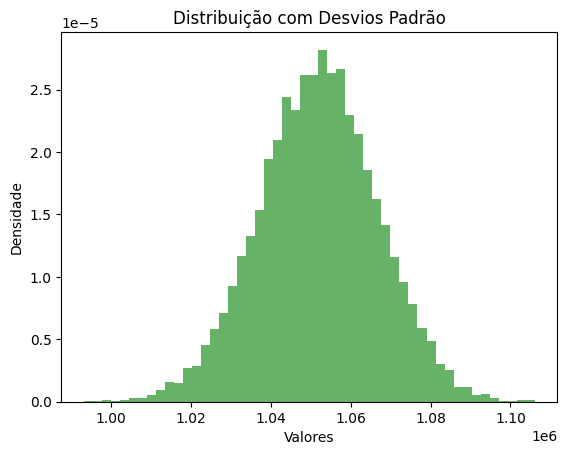

In [71]:
# Criar o gráfico de distribuição
plt.hist(custos_totais_p1, bins=50, density=True, alpha=0.6, color='g')

# Adicionar rótulos
plt.title('Distribuição com Desvios Padrão')
plt.xlabel('Valores')
plt.ylabel('Densidade')

# Mostrar o gráfico
plt.show()

Como é observado no gráfico, a distribuição de orçamentos gerado pelo metodo Monte Carlo gera uma distribuição normal, assim, podemos usar as geras do teorema do limete central

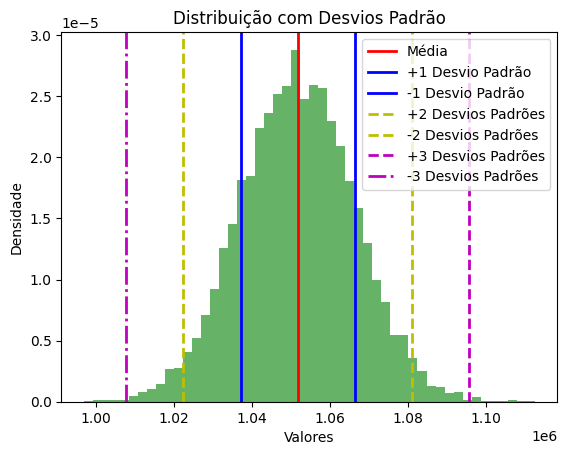

In [81]:
# Criar o gráfico de distribuição
plt.hist(custos_totais_p1, bins=50, density=True, alpha=0.6, color='g')

# Adicionar a média e os desvios padrão ao gráfico
plt.axvline(media_custo_total_p1, color='r',  linewidth=2, label='Média')
plt.axvline(media_custo_total_p1 + desvio_padrao_custo_total_p1, color='b',  linewidth=2, label='+1 Desvio Padrão')
plt.axvline(media_custo_total_p1 - desvio_padrao_custo_total_p1, color='b',  linewidth=2, label='-1 Desvio Padrão')
plt.axvline(media_custo_total_p1 + 2 * desvio_padrao_custo_total_p1, color='y', linestyle='dashed', linewidth=2, label='+2 Desvios Padrões')
plt.axvline(media_custo_total_p1 - 2 * desvio_padrao_custo_total_p1, color='y', linestyle='dashed', linewidth=2, label='-2 Desvios Padrões')
plt.axvline(media_custo_total_p1 + 3 * desvio_padrao_custo_total_p1, color='m', linestyle='dashed', linewidth=2, label='+3 Desvios Padrões')
plt.axvline(media_custo_total_p1 - 3 * desvio_padrao_custo_total_p1, color='m', linestyle='-.', linewidth=2, label='-3 Desvios Padrões')

# Adicionar legenda
plt.legend()

# Adicionar rótulos
plt.title('Distribuição com Desvios Padrão')
plt.xlabel('Valores')
plt.ylabel('Densidade')

# Mostrar o gráfico
plt.show()


Um dos conceitos do teorema é que área correspondida entre as linhas azual represenra o primeiro desvio padrão acima e abaixo da média. Esse primeiro desvio padrão de disância da média corresponde a aproximadamente 68% da área do gráfico, isso é, 68% dos orçamentos simulados cairam nessa faixa, o que nos fornece uma faixa de segurança de 68%.

In [129]:

desvio_superior =  media_custo_total_p1 + desvio_padrao_custo_total_p1
desvio_inferior =  media_custo_total_p1 - desvio_padrao_custo_total_p1


print(f"\n\nCom parametros semelhates a P1, a posibilidade de ocorrer um orçamento dentro da faixa azul é de 68% e a faixa de valores possíveis são: R${desvio_inferior:.2f} até R${desvio_superior:.2f}")



Com parametros semelhates a P1, a posibilidade de ocorrer um orçamento dentro da faixa azul é de 68% e a faixa de valores possíveis são: R$1037072.86 até R$1066368.07


Podemos também calcular outras faixas dentro dessa distibuição. Por exemplo, qual a probabilidade de ocorrer um orçamento acima do primeiro desvio padrão?

In [97]:
from scipy.stats import zscore
# calcular o Z-score
z_score = (desvio_superior - media_custo_total_p1)/desvio_padrao_custo_total_p1

# extrair a probabilidade acumulada até o Z-score
prob_ate_d1 =  norm.cdf(z_score)

# extrair a probabilidade superior ao desvio padrão
prob_superior_d1 = 1 - prob_ate_d1

print(f"A probabilidade até o primeiro desvio padrão(R${desvio_superior:.2f}) é {prob_ate_d1:.2f}, logo, a probabilidade de ocorrer um valor superior é de {prob_superior_d1:.2f}.")

A probabilidade até o primeiro desvio padrão(R$1066368.07) é 0.84, logo, a probabilidade de ocorrer um valor superior é de 0.16.


# **Modelo de regressão multipla**

Pivotar as tabelas para alimentação do modelo de machine learning

In [ ]:
# criação de índices
df_resultado_p1['indice'] = 1
df_resultado_p2['indice'] = 1
df_resultado_p3['indice'] = 1

#transpor dataset dos dados projetos
df_p1 = pd.DataFrame(dados_p1.transpose())
df_p2 = pd.DataFrame(dados_p2.transpose())
df_p3 = pd.DataFrame(dados_p3.transpose())


# Usar a primeira linha como cabeçalho
df_p1.columns = df_p1.iloc[0]

# Remover a primeira linha (que agora é o cabeçalho)
df_p1 = df_p1[1:]

# Criar índice para mesclar
df_p1['indice'] = 1

# nos outros datasets
df_p2.columns = df_p2.iloc[0]
df_p2 = df_p2[1:]
df_p2['indice'] = 1

df_p3.columns = df_p3.iloc[0]
df_p3 = df_p3[1:]
df_p3['indice'] = 1

# transformar os valores categoricos em numéricos



# reshape
custo_p1 = pd.DataFrame({'orcamento':custos_totais_p1, 'indice':1})

df_mesclado1 = pd.merge(df_p1, custo_p1)


custo_p2= pd.DataFrame({'orcamento':custos_totais_p2, 'indice':1})

df_mesclado2 = pd.merge(df_p2, custo_p2)


custo_p3 = pd.DataFrame({'orcamento':custos_totais_p3, 'indice':1})

df_mesclado3 = pd.merge(df_p3, custo_p3)

In [ ]:
df_mesclado2 = pd.merge(df_p2, custo_p2)
df_mesclado1 = pd.merge(df_p1, custo_p3)

In [ ]:
# concatenar todos os datasets
df_modelo = pd.concat([df_mesclado1,df_mesclado2,df_mesclado3])


Treinamento do modelo e a avaliação

In [ ]:


# Separando as variáveis independentes (X) e a variável dependente (y)
X = df_modelo[['Tipologia'	,'Área Terreno'	,'Área Construída'	,'Área Fundação',	'Área Fachada',	'Área Parede',	'Qtde BWCs']]
y = df_modelo['orcamento']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando um transformador para variáveis categóricas
categorical_features = ['Tipologia' ]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Criando um transformador para variáveis numéricas
numeric_features = ['Área Terreno'	,'Área Construída'	,'Área Fundação',	'Área Fachada',	'Área Parede',	'Qtde BWCs']
numeric_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Criando um pré-processador que aplica transformadores às colunas específicas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Criando o pipeline com o pré-processador e o modelo de regressão linear
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Treinando o modelo
model.fit(X_train, y_train)

# Avaliando o modelo no conjunto de teste
print(score = model.score(X_test, y_test))






Claramente o modelo tem for viés por não utilizar uma base de dados abrangente, sendo pouco eficaz para previções.






# **Conclusão do trabalho e escolha do método de estimação**

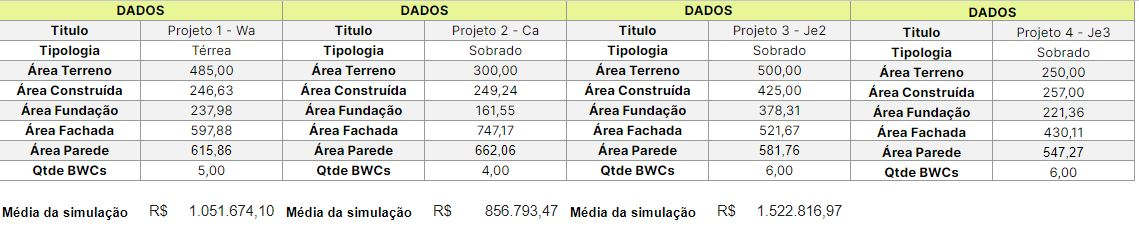


A partir desses dados, opto por utilizar a média ponderada e estabeleço um valor razoável para a acurácia baseada em 1 desvio padrão da distribuição dos 10000 testes.

In [171]:

area_terrenoP2 = 300
area_construidaP2 = 249.24
area_fundacaoP2 = 161.55
area_fachadaP2 = 747.17
area_paredeP2 = 662.06
bwcP2 = 4
custoP2 = 856793.47

area_terrenoP3 = 500
area_construidaP3 = 425.00
area_fundacaoP3 = 378.31
area_fachadaP3 = 521.67
area_paredeP3 = 581.76
bwcP3 = 6
custoP3 = 1522816.97


custo_area_terreno = ((custoP2/area_terrenoP2) + (custoP3/area_terrenoP3))/2
custo_area_construida = ((custoP2/area_construidaP2) + (custoP3/area_construidaP3))/2
custo_area_fundacao = ((custoP2/area_fundacaoP2) + (custoP3/area_fundacaoP3))/2
custo_area_fachada = ((custoP2/area_fachadaP2)  + (custoP3/area_fachadaP3) )/2
custo_area_parede =  ((custoP2/area_paredeP2)  + (custoP3/area_paredeP3) )/2
bwcs = ((custoP2/bwcP2) + (custoP2/bwcP3))/2



area_terrenoP4 = 250
area_construidaP4 = 257
area_fundacaoP4 = 221.36
area_fachadaP4 = 430.11
area_paredeP4 = 547.27
bwcs_p4 = 6

custo_area_terreno_P4 = custo_area_terreno * area_terrenoP4
custo_area_construida_p4 = custo_area_construida * area_construidaP4
custo_area_fundacao_P4 =  custo_area_fundacao * area_fundacaoP4
custo_area_fachada_p4 = custo_area_fachada * area_fachadaP4
custo_area_parede_P4 = custo_area_parede * area_paredeP4
bwcs_P4 =  bwcs * bwcs_p4


custo_estimado_P4 = (custo_area_terreno_P4 + custo_area_construida_p4 + custo_area_fundacao_P4 + custo_area_fachada_p4 + custo_area_parede_P4 + bwcs_P4)/6

print(f"O custo estimado para o projeto 4 é de R${custo_estimado_P4:.2f}")

O custo estimado para o projeto 4 é de R$948024.18


Outra possibilidade seria calcular alguma métricas e inferir no orçamento P4


In [ ]:
# Adiciona um componente aleatório para ajustar cada preço

random.seed(4545)

# vetores com comprimento dos orçamentos
num_simulacao = range(10000)
vetor_size_p1 = len(df_resultado_p1['value'])
vetor_size_p2 = len(df_resultado_p2['value'])
vetor_size_p3 = len(df_resultado_p3['value'])



preco_p4 = df_resultado_p3['value']
custos_totais_p3 =[]

# Elaboração de 10000 iterações ajustando os custos dos orçamentos pelo Monte Carlo

for i in num_simulacao:

  # Orcamento P1
  valor_total_p1 = preco_p1*np.random.normal(loc=1, scale=0.1,size=vetor_size_p1) # multiplicação dos preços por vetor com valores
  custos_totais_p1.append(valor_total_p1.sum())
  # Orcamento P2
  valor_total_p2 = preco_p2*np.random.normal(loc=1, scale=0.1,size=vetor_size_p2)
  custos_totais_p2.append(valor_total_p2.sum())
  # Orcamento P3
  valor_total_p3 = preco_p3*np.random.normal(loc=1, scale=0.1,size=vetor_size_p3)
  custos_totais_p3.append(valor_total_p3.sum())


# Estatísticas dos custos simulados P1
media_custo_total_p1 = np.mean(custos_totais_p1)
desvio_padrao_custo_total_p1 = np.std(custos_totais_p1)

# Exibir resultados
print(f"\nMédia estimada do custo da obra: R${media_custo_total_p1:.2f}")
print(f"\nDesvio padrão estimado do custo da obra: R${desvio_padrao_custo_total_p1:.2f}")

In [ ]:
# extremos
maximo = max(custos_totais_p1)
minimo = min(custos_totais_p1)
amplitude = maximo - minimo

# criação do intervalo de classe
k = 1 + 3.3 * np.log10(len(custos_totais_p1) )

intervalo = ((amplitude)/k )

# Calcular o número de classes
num_classes = int((maximo - minimo) / intervalo)

# Criar intervalos
intervalos = [(minimo + i * intervalo, minimo + (i + 1) * intervalo) for i in range(num_classes+1)]

# Criar uma tabela vazia
tabela_frequencia = pd.DataFrame(columns=['Classes', 'Frequência'])

# Preencher a tabela com intervalos
tabela_frequencia['Classes'] = [f'{int(inf)} x {int(sup)}' for (inf, sup) in intervalos]

# Calcular a frequência em cada classe
tabela_frequencia['Frequência'] = [sum((inf <= x < sup) for x in custos_totais_p1) for (inf, sup) in intervalos]

#

tabela_frequencia['Frequência %'] = (tabela_frequencia['Frequência']/10000)*100

# Calcular a frequência acumulada em cada classe
tabela_frequencia['Frequência acumulada'] = tabela_frequencia['Frequência'].cumsum()

tabela_frequencia['Frequência acumulada %'] = (tabela_frequencia['Frequência acumulada']/10000)*100


tabela_frequencia

In [183]:
# média ponderada dos cenarios previstos
estimativa = ((np.mean(custos_totais_p1) + 2*np.mean(custos_totais_p2) + 2*np.mean(custos_totais_p3))/5) # ponderação baseada na tipologia
# desvio ponderado dos cenários previstos
desvio_padrao = (   np.std(custos_totais_p1) + 2*np.std(custos_totais_p2) + 2*np.std(custos_totais_p3  )/5) # ponderação baseada na tipologia


# Exibir resultados
print(f"Média ponderada estimada do custo das 3 obras: R${estimativa:.2f}")
print(f"Desvio padrão estimado do custo da obra: R${desvio_padrao:.2f}\n")
print(f"Estimação com 1 desvio padrão: R${(116238963 - desvio_padrao):.2f} a {(116238963 + desvio_padrao):.2f}\n")
print(f"Faixa R$101.264.36 com 68% de margem de segurança")


Média ponderada estimada do custo das 3 obras: R$1162424.96
Desvio padrão estimado do custo da obra: R$50540.41

Estimação com 1 desvio padrão: R$116188422.59 a 116289503.41

Faixa R$101.264.36 com 68% de margem de segurança


Sendo assim, basedo na exploração dos dados, vejo como única solução possível uma estimação bruta, baseada na variação de cenários apresentados pela modelagem de monte carlo. O algoritmo de regressão elaborabo será de pouca serventia, já que não há dados o bastante e a simulação enviesa bastante os dados.